## KNN
### K-근접 이웃 분류(K-Nearest Neighbors classifier)

#### k- 근접 이웃 분류
> - k-근접 이웃 분류 모형이란 새로운 점이 주어지면 그 점으로부터 가까운 점 K개를 이용해 분류하는 머신러닝 기법 

#### 적정 K의 선정
> - 너무 작은 K를 선정하면 주변 소수의 데이터에 너무 큰 영향을 받는다. 
> - 너무 큰 K를 선정하면 관련이 없는 먼 곳의 데이터까지 분류에 영향을 끼치고 정작 중요한 주변의 데이터 영향력은 작아진다. 
> - Cross Validation(교차 검증)을 통해 오분류율이 낮은 K를 선정한다. 
> - K값은 일반적으로 홀수를 취한다. 


#### K-NN Regression 
> - 범주형은 물론 연속형 데이터의 경우에도 K-NN기법을 사용할 수 있다. 
> - 주변 K개 데이터 값의 평균을 예측값으로 사용한다. 
> - 연속형 데이터에 대한 K-NN을 K-NN Regression이라고 한다. 


In [39]:
autoparts <- read.csv("autoparts.csv", header = TRUE)
autoparts1 <- autoparts[autoparts$prod_no == "90784-76001", c(2:11)]
autoparts2 <- autoparts1[autoparts1$c_thickness < 1000, ]
autoparts2$y_faulty <- ifelse((autoparts2$c_thickness < 20) | (autoparts2$c_thickness > 32), 1, 0)


In [40]:
t_index <- sample(1:nrow(autoparts2), size = nrow(autoparts2) * 0.7)
train <- autoparts2[t_index, ]
test <- autoparts2[-t_index, ]

#### Argument 준비 

In [41]:
# 훈련데이터 행렬과 종속변수 (K-NN은 matrix로 데이터를 넘겨야함)
xmat.train <- as.matrix(train[1:9])
y_faulty.train <- train$y_faulty

# 검정 데이터 행렬

xmat.test <- as.matrix(test[1:9])

# KNN이 포함되어 있는 package를 불러오기
# KNN은 모델을 만들지 않고 함수에 바로 집어 넣음
install.packages('class')

In [43]:
library(class)

In [44]:
yhat_test <- knn(xmat.train, xmat.test, as.factor(y_faulty.train), k = 3)
yhat_test
table <- table(real = test$y_faulty, predict = yhat_test)
table
(table[1,1] + table[2,2])/sum(table)

[1] 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
  [38] 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
  [75] 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1
 [112] 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 1 0 1 1 1 1 1
 [149] 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0
 [186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 [223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 [260] 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 [297] 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0
 [334] 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0
 [371] 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1
 [408] 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [445] 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 [482] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [519] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 [556] 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 [593] 1 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 [630] 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 [667] 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1
 [704] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1
 [741] 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 [778] 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 [815] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [852] 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 [889] 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0
 [926] 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1
 [963] 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0
[1000] 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
[1037] 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1074] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
[1111] 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0
[1148] 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0
[1185] 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0
[1222] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1259] 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
[1296] 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0
[1333] 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
[1370] 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0
[1407] 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
[1444] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1481] 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1
[1518] 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0
[1555] 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1
[1592] 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1
[1629] 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
[1666] 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1
[1703] 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0
[1740] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1777] 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1814] 0 0 0 0 0 0 0 0 0 0 0 0 0 0

    predict
real    0    1
   0 5541  137
   1  180  673

[1] 0.9514623


Parameter tuning of 'knn.wrapper':

- sampling method: 10-fold cross validation 

- best parameters:
 k
 5

- best performance: 0.04620642 


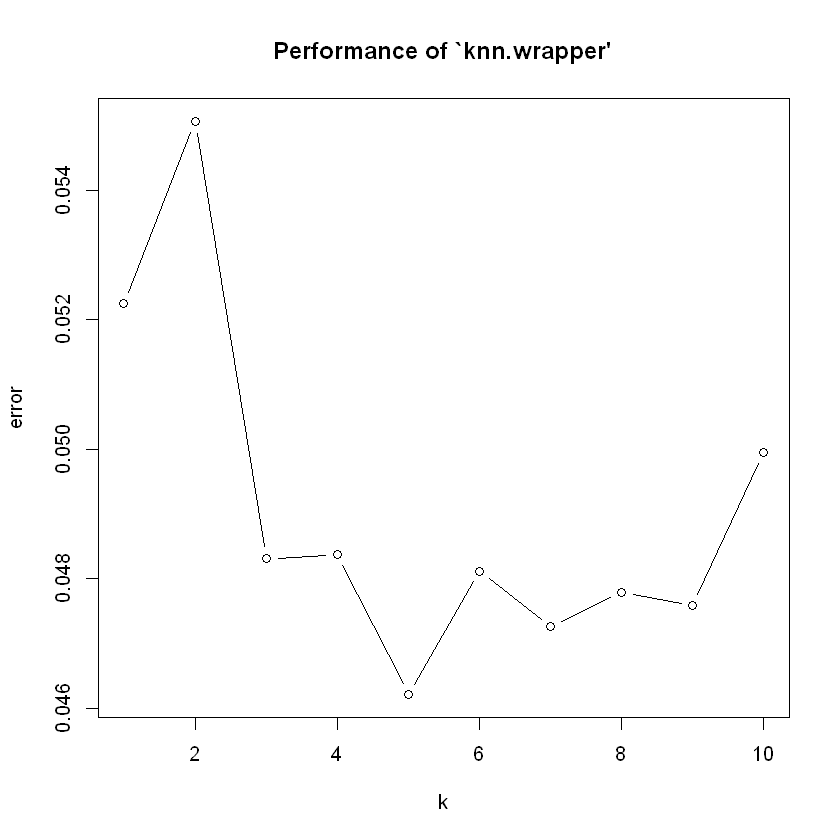

In [45]:
library(e1071)
tune.out <- tune.knn(xmat.train, y = as.factor(y_faulty.train),k = 1:10)
tune.out
plot(tune.out)

In [24]:
#### knn 재수행

In [46]:
yhat_test <- knn(xmat.train, xmat.test, y_faulty.train, k = 5)
table <- table(real = test$y_faulty, predict = yhat_test)
table
(table[1,1] + table[2,2])/sum(table)

    predict
real    0    1
   0 5575  103
   1  186  667

[1] 0.9557495

In [47]:
library(Epi)

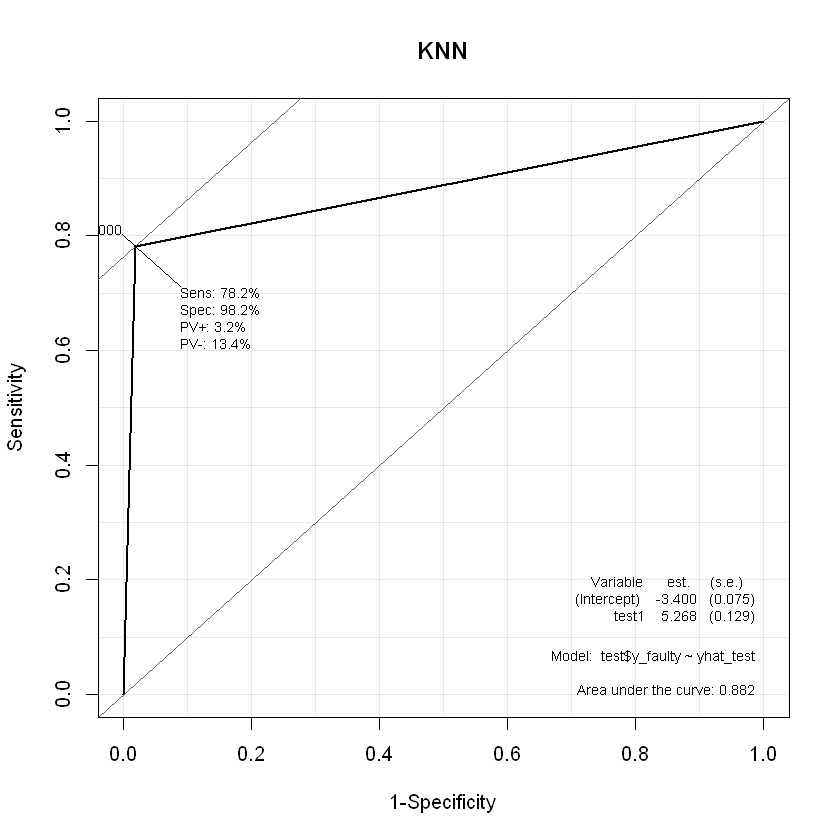

In [48]:
ROC(test = yhat_test,stat = test$y_faulty,plot = 'ROC',AUC = T, main = 'KNN')


Parameter tuning of 'knn.wrapper':

- sampling method: 10-fold cross validation 

- best parameters:
 k
 7

- best performance: 0.04600922 


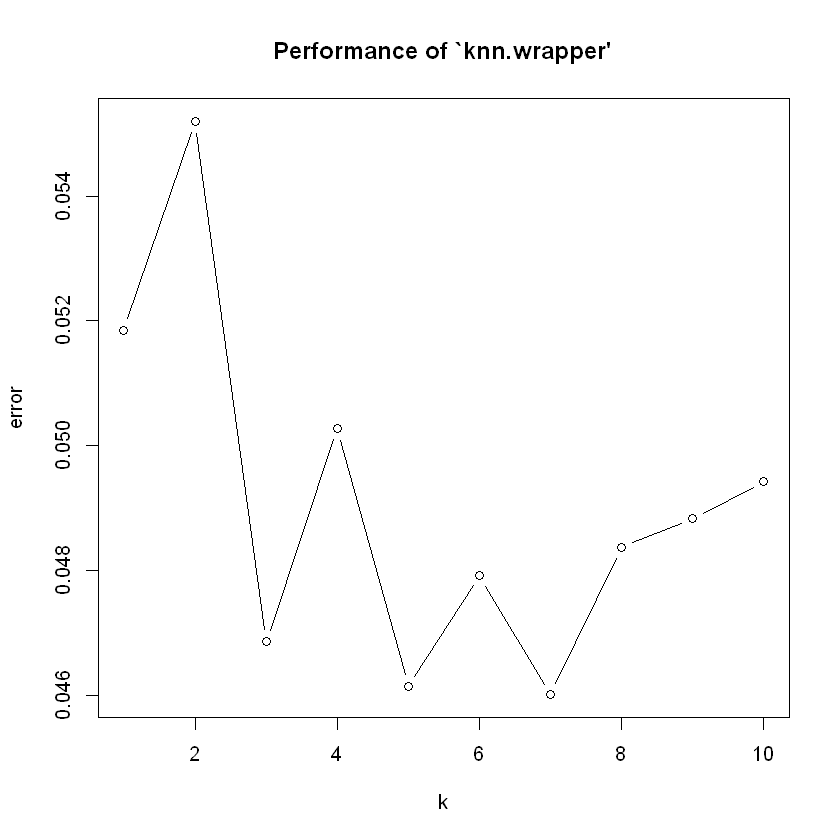

In [49]:
# 최적값 k 찾기

library(e1071)
tune.out <- tune.knn(x = xmat.train, y = as.factor(y_faulty.train), k = 1:10)
tune.out
plot(tune.out)


In [51]:

# knn 재수행

yhat_test <- knn(xmat.train, xmat.test, as.factor(y_faulty.train), k = 7)
table <- table(real = test$y_faulty, predict = yhat_test)
table 
(table[1, 1] + table[2, 2])/sum(table)


    predict
real    0    1
   0 5578  100
   1  189  664

[1] 0.9557495

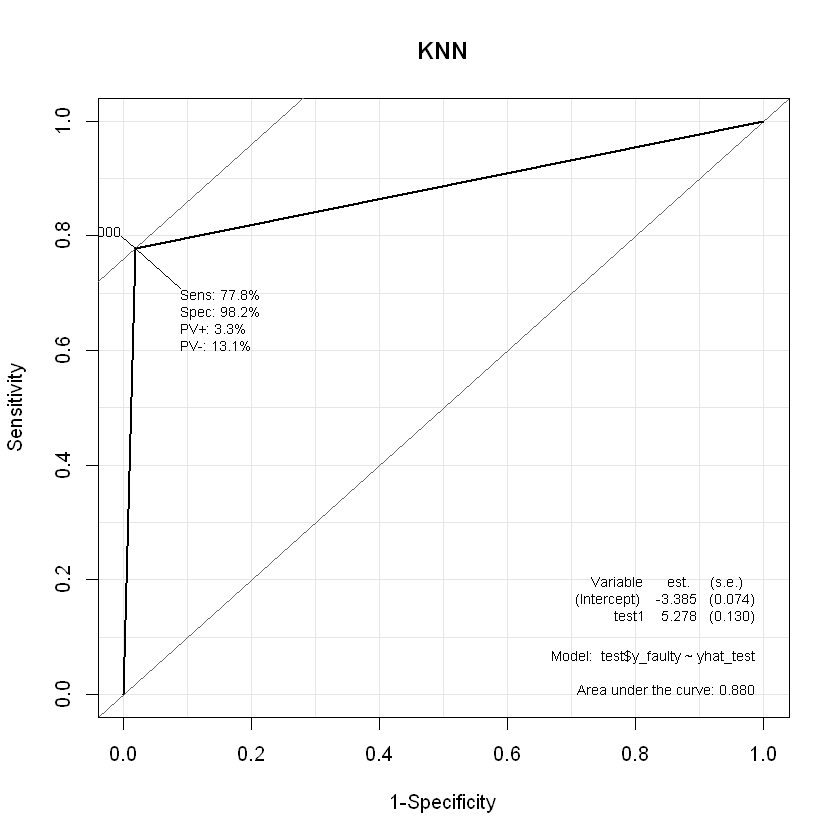

In [52]:

# ROC, AUC

library(Epi)
ROC(test = yhat_test, stat = test$y_faulty, plot = "ROC", AUC = T, main = "KNN")


In [53]:

# 새로운 데이터 예측 - 한 개 데이터 예측

new.data <- data.frame(fix_time = 87, a_speed = 0.609, b_speed = 1.715, separation = 242.7, s_separation = 657.5, rate_terms = 95, mpa = 78, load_time = 18.1, highpressure_time = 82)
knn(xmat.train, new.data, y_faulty.train, k = 5)



[1] 0
Levels: 0 1

In [54]:
# 새로운 데이터 예측 - 복수 데이터 예측1 벡터

new.data <- data.frame(fix_time = c(87, 85.6), a_speed = c(0.609, 0.472), b_speed = c(1.715, 1.685), separation = c(242.7, 243.4), s_separation = c(657.5, 657.9), rate_terms = c(95, 95), mpa = c(78, 28.8), load_time = c(18.1, 18.2), highpressure_time = c(82, 60))
knn(xmat.train, new.data, y_faulty.train, k = 5)



[1] 0 1
Levels: 0 1

In [55]:
# 새로운 데이터 예측 - 복수 데이터 예측2 데이터프레임

new.data <- data.frame(fix_time = test$fix_time, a_speed = test$a_speed, b_speed = test$b_speed, separation = test$separation, s_separation = test$s_separation, rate_terms = test$rate_terms, mpa = test$mpa, load_time = test$load_time, highpressure_time = test$highpressure_time) 
knn(xmat.train, new.data, y_faulty.train, k = 5)


[1] 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
  [38] 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
  [75] 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1
 [112] 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1
 [149] 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0
 [186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 [223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 [260] 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 [297] 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0
 [334] 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0
 [371] 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1
 [408] 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [445] 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 [482] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [519] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 [556] 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0
 [593] 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 [630] 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 [667] 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1
 [704] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1
 [741] 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 [778] 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 [815] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [852] 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [889] 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0
 [926] 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1
 [963] 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1
[1000] 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
[1037] 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1074] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
[1111] 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0
[1148] 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
[1185] 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0
[1222] 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1259] 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1296] 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0
[1333] 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
[1370] 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0
[1407] 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
[1444] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1481] 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1
[1518] 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0
[1555] 1 1 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1
[1592] 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1
[1629] 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1666] 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1
[1703] 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
[1740] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1777] 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
[1814] 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [56]:

# 종속변수가 다항인 경우의 K-NN 

autoparts <- read.csv("autoparts.csv", header = TRUE)
autoparts1 <- autoparts[autoparts$prod_no == "90784-76001", c(2:11)]
autoparts2 <- autoparts1[autoparts1$c_thickness < 1000, ]
autoparts2$g_class <- as.factor(ifelse(autoparts2$c_thickness < 20, 1, ifelse(autoparts2$c_thickness < 32, 2, 3)))
t_index <- sample(1:nrow(autoparts2), size = nrow(autoparts2) * 0.7)
train <- autoparts2[t_index, ]
test <- autoparts2[-t_index, ]

xmat.train <- as.matrix(train[1:9])
g_class.train <- train$g_class
xmat.test <- as.matrix(test[1:9])

yhat_test <- knn(xmat.train, xmat.test, g_class.train, k = 3)
table <- table(real = test$g_class, predict = yhat_test)
table
(table[1, 1] + table[2, 2] + table[3, 3])/sum(table)

    predict
real    1    2    3
   1  522  153    2
   2   58 5564   45
   3    0   36  151

[1] 0.9549839

In [57]:
# 종속변수가 연속형인 경우의 KNN

autoparts <- read.csv("autoparts.csv", header = TRUE)
autoparts1 <- autoparts[autoparts$prod_no == "90784-76001", c(2:11)]
autoparts2 <- autoparts1[autoparts1$c_thickness < 1000, ]
autoparts2$y_faulty <- ifelse((autoparts2$c_thickness < 20) | (autoparts2$c_thickness > 32), 1, 0)

t_index <- sample(1:nrow(autoparts2), size = nrow(autoparts2) * 0.7)
train <- autoparts2[t_index, ]
test <- autoparts2[-t_index, ]

In [60]:
xmat.train <- as.matrix(train[1:9])
c_thickness.train <- train$c_thickness
xmat.test <- as.matrix(test[1:9])

In [59]:
install.packages('FNN')
library(FNN)

Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'를 열 수 없습니다"

package 'FNN' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Administrator\AppData\Local\Temp\Rtmps3tS7O\downloaded_packages



Attaching package: 'FNN'

The following objects are masked from 'package:class':

    knn, knn.cv



In [61]:
yhat_test <- knn.reg(xmat.train,xmat.test, c_thickness.train, k=3)
mse <- mean((yhat_test$pred - test$c_thickness)^2)
mse

[1] 1.151215

In [66]:
# 단일 데이터 예측 
new.data <- data.frame(fix_time = 87, a_speed = 0.609, b_speed = 1.175,
                      separation = 242.7, s_separation = 657.5,
                      rate_terms = 95, mpa = 78, load_time = 18.1,
                      highpressure_time = 82)
new.data <- as.matrix(new.data)
knn(xmat.train, new.data, c_thickness.train, k = 3)


[1] 24.1
attr(,"nn.index")
     [,1] [,2] [,3]
[1,] 7379 2245 2491
attr(,"nn.dist")
         [,1]     [,2]     [,3]
[1,] 1.136486 1.737776 2.047974
Levels: 24.1

In [67]:
# 복수 데이터 예측
new.data <- data.frame(fix_time = c(87,85.6), a_speed = c(0.609,0.472),
                       b_speed = c(1.175,1.685),
                      separation = c(242.7,243.4), s_separation = c(657.5,657.9),
                      rate_terms = c(95,95), mpa = c(78,28.8),
                       load_time =c(18.1,18.2),highpressure_time =c(82,60))
new.data <- as.matrix(new.data)
knn(xmat.train, new.data, c_thickness.train, k = 3)


[1] 24.1 35.7
attr(,"nn.index")
     [,1] [,2] [,3]
[1,] 7379 2245 2491
[2,] 2452 7685 1814
attr(,"nn.dist")
         [,1]     [,2]     [,3]
[1,] 1.136486 1.737776 2.047974
[2,] 1.104545 1.421425 4.490070
Levels: 24.1 35.7